In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from pathlib import Path
from datetime import datetime, timedelta
import os
import seaborn as sns
import openpyxl
from collections import Counter
from scipy.io import savemat
import scipy.stats as stats
from palettable.colorbrewer.qualitative import Set1_6

Generate two random variables $X$ and $Y$.
* $X$ from a normal distribution with mean and variance $[0, 1]$.
* $Y$ from a normal distribution with mean and variance $[10, 0.8]$.

Mean(X)= -0.04070076095355859
Var(X)= 1.2013087189300282
Mean(Y)= 9.995413673959096
Var(Y)= 0.7086641835789163


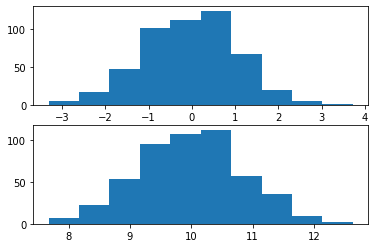

In [2]:
X = np.random.normal(0, 1, 500)
Y = np.random.normal(10, 0.8, 500)
plt.figure(figsize=(6,4))
plt.subplot(211)
plt.hist(X, bins=10)
plt.subplot(212)
plt.hist(Y, bins=10)
print('Mean(X)=', np.mean(X))
print('Var(X)=', np.var(X))
print('Mean(Y)=', np.mean(Y))
print('Var(Y)=', np.var(Y))

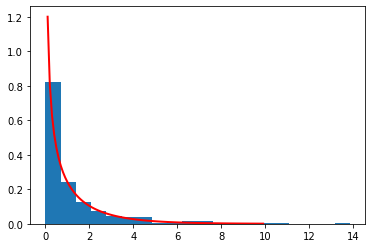

In [3]:
X_chi2 = X**2
plt.hist(X_chi2, bins=20, density=True)
step = np.arange(0, 10, 0.1)
chi2 = stats.chi2.pdf(step, df=1)
plt.plot(step, chi2, color='r', lw=2)

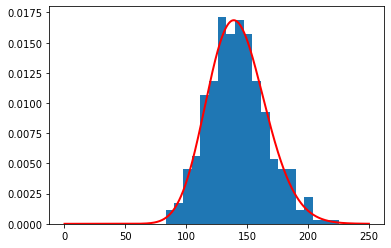

In [4]:
# https://stats.stackexchange.com/questions/201358/distribution-of-the-square-of-a-non-standard-normal-random-variable
Y_chi2 = Y**2/np.var(Y)
plt.hist(Y_chi2, bins=20, density=True)
step = np.arange(0, 250, 0.1)
nc = (np.mean(Y)/np.std(Y))**2
chi2NonCentral = stats.ncx2.pdf(step, 1, nc)
plt.plot(step, chi2NonCentral, color='r', lw=2)

In [5]:
chi2NonCentral = np.nan_to_num(chi2NonCentral)
chi2 = chi2[1:-1]

In [11]:
np.sum(np.convolve(chi2, chi2NonCentral)*0.1)

8.153417946397521

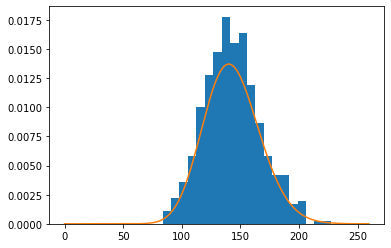

In [7]:
dist_chi2 = Y**2/np.var(Y)+X**2
plt.hist(dist_chi2, bins=20, density=True);
step = np.arange(0, 0.1*len(np.convolve(chi2, chi2NonCentral)), 0.1)
plt.plot(step, np.convolve(chi2, chi2NonCentral)*0.1)